In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import re

In [43]:
brands = pd.read_csv('brands_cl.csv')
products = pd.read_csv('products_cl.csv')
orders = pd.read_csv('orders_cl.csv')
orderlines = pd.read_csv('orderlines_cl.csv')

#further cleaning
products.drop(columns='max_price_orderlines', inplace=True)
products.dropna(inplace=True)

In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [45]:
products = (products
    .assign(brands_letters=products['sku'].str[:3])
    .merge(brands, left_on='brands_letters', right_on='short')
    .drop(columns=['brands_letters','short','type'])
)

In [46]:
products = products[['sku','long','name','desc','price']]
products.rename(columns={'sku':'sku','long':'brand','name':'name','desc':'description','price':'price'})

,sku,brand,name,description,price
0,RAI0007,Rain Design,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99
1,RAI0014,Rain Design,Rain Design iSlider iPad Support,Anodized aluminum support multiposition iPad and iPad mini.,49.99
2,RAI0015,Rain Design,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99
3,RAI0016,Rain Design,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible with all MacBook,84.99
4,RAI0018,Rain Design,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99
...,...,...,...,...,...
9749,RYV0009,Ryval,Ryval Base Magnetic Qi Wireless Charging Office,Wireless charging base Ryval magnetic and Qi technology ideal for iPhone X / 8Plus / 8 at home a...,49.99
9750,RYV0010,Ryval,Ryval magnetic Qi Wireless Car Charger,Ryval magnetic car charger and Qi Wireless technology is ideal for iPhone X / 8Plus / 8,49.99
9751,MTF0008,Mistify,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99
9752,SDE0007,SDesign,SDesign iPhone charging dock QI X / 8 / Apple Watch (75-10W),Base load compatible with iPhone and Apple Watch supports multiload,69.99


In [47]:
#Categoryvariables
storage = 'SSD|HDD|Storage|Drive|SATA|Data|SDHC|SDXC|Seagate|WD|WesternDigital|Hard.*Disk|RAID'
protection = 'Case|Protector|Capsule|Gauntlet|Sleeve|EnclosureProtection'
cable = 'Cable|Charger'
adapter = 'Adapter'
sound = 'Speaker|Phones|Sound|Headset|Voice'
memory = 'DDR'
nas = 'NAS'
docks = 'Dock|Dockingstation'
inputdev = 'Mouse|Keyboard| Pen|Track'
battery = 'Battery|mAh'
network = 'Wireless|Switch|Router|wi-fi|LAN|Port|Powerline'

#ItemList = storage+"|"+protection+"|"+cable+"|"+adapter+"|"+sound+"|"+memory+"|"+nas+"|"+docks+"|"+inputdev+"|"+battery+"|"+network

In [48]:
products['product_category'] = np.where(products.name.str.contains(storage, flags=re.IGNORECASE, regex=True), 'Storagehardware', "--O-T-H-E-R--")
products['product_category'] = np.where(products.name.str.contains(protection, flags=re.IGNORECASE, regex=True), 'Protection', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(cable, flags=re.IGNORECASE, regex=True), 'Cables & Charger', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(adapter, flags=re.IGNORECASE, regex=True), 'Adapter', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(sound, flags=re.IGNORECASE, regex=True), 'Sound', products['product_category'])

products['product_category'] = np.where(products.name.str.contains(memory, flags=re.IGNORECASE, regex=True), 'Memory', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(nas, flags=re.IGNORECASE, regex=True), 'NAS', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(docks, flags=re.IGNORECASE, regex=True), 'Dockingstation', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(inputdev, flags=re.IGNORECASE, regex=True), 'Input Device', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(battery, flags=re.IGNORECASE, regex=True), 'Battery', products['product_category'])
products['product_category'] = np.where(products.name.str.contains(network, flags=re.IGNORECASE, regex=True), 'Networkequipment', products['product_category'])

products['product_category'] = np.where((products.price > 300) & products.name.str.contains('TV', flags=re.IGNORECASE, regex=True), 'TV', products['product_category'])
products['product_category'] = np.where((products.price > 300) & products.name.str.contains('Watch', flags=re.IGNORECASE, regex=True), 'Smartwatch', products['product_category'])
products['product_category'] = np.where((products.price > 100) & products.name.str.contains('Monitor|Display', flags=re.IGNORECASE, regex=True), 'Monitor', products['product_category'])
products['product_category'] = np.where((products.price > 100) & products.name.str.contains('iPod', flags=re.IGNORECASE, regex=True), 'Musicplayer', products['product_category'])
products['product_category'] = np.where((products.price > 300) & products.name.str.contains('iPad|Tablet|Studio', flags=re.IGNORECASE, regex=True), 'Tablet', products['product_category'])
products['product_category'] = np.where((products.price > 300) & products.name.str.contains('i?Phone', flags=re.IGNORECASE, regex=True), 'Smartphone', products['product_category'])
products['product_category'] = np.where((products.price > 500) & products.name.str.contains('MacBook|Notebook|Laptop', flags=re.IGNORECASE, regex=True), 'Laptop', products['product_category'])
products['product_category'] = np.where((products.price > 500) & products.name.str.contains('i?Mac|Desktop', flags=re.IGNORECASE, regex=True), 'Desktop-PC', products['product_category'])

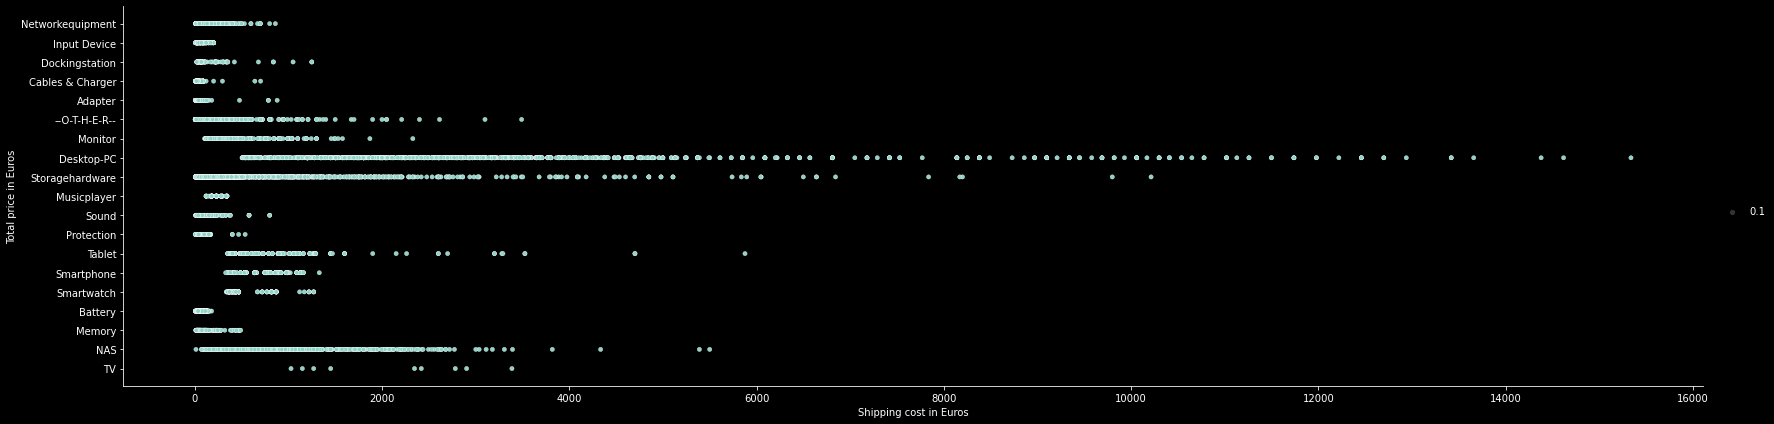

In [50]:
sns.relplot(x="price",
                y="product_category",
                size=0.1,
                height= 6,
                aspect = 4.0,
                data=products[['product_category','price']])

plt.xlabel('Shipping cost in Euros')
plt.ylabel('Total price in Euros')
sns.despine()